# Regression Modeling Exercises

1. Select a dataset with a continuous target variable.

2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [92]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

sns.set_palette('nipy_spectral')

import wrangle as w
import explore as ex
import evaluate as ev

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# First Year GPA
Data is from a dataset called First Year GPA (documentation can be found [here](https://vincentarelbundock.github.io/Rdatasets/doc/Stat2Data/FirstYearGPA.html))

- Target will be to predict first year of collge GPA

### Data Dictionary 
Variable | Description
-- | --
GPA | First-year college GPA on a 0.0 to 4.0 scale
HSGPA |High school GPA on a 0.0 to 4.0 scale
SATV	|Verbal/critical reading SAT score
SATM	|Math SAT score
Male	|1= male, 0= female
HU	|Number of credit hours earned in humanities courses in high school
SS	|Number of credit hours earned in social science courses in high school
FirstGen	|1= student is the first in her or his family to attend college, 0=otherwise
White	|1= white students, 0= others
CollegeBound	|1=attended a high school where >=50% students intended to go on to college, 0=otherwise


In [2]:
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [82]:
sns.color_palette()

[(0.0941117647058824, 0.0, 0.6549294117647059),
 (0.0, 0.5634078431372549, 0.8667),
 (0.0, 0.6300803921568627, 0.24050784313725487),
 (0.0, 0.9268156862745098, 0.0),
 (0.9516098039215687, 0.8967078431372549, 0.0),
 (0.9764764705882353, 0.0, 0.0)]

In [4]:
# read dataset into dataframe
df = pd.read_csv('FirstYearGPA.csv')

In [5]:
# Take a peak at the data
# looks like the first column is a student number (probably can drop it and just use the index)
df.head()

Unnamed: 0   GPA  HSGPA  SATV  SATM  Male    HU    SS  FirstGen  White  \
0           1  3.06   3.83   680   770     1   3.0   9.0         1      1   
1           2  4.15   4.00   740   720     0   9.0   3.0         0      1   
2           3  3.41   3.70   640   570     0  16.0  13.0         0      0   
3           4  3.21   3.51   740   700     0  22.0   0.0         0      1   
4           5  3.48   3.83   610   610     0  30.5   1.5         0      1   

   CollegeBound  
0             1  
1             1  
2             1  
3             1  
4             1

In [6]:
# all of the data appears to be numbers should be able to plot pretty easily
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    219 non-null    int64  
 1   GPA           219 non-null    float64
 2   HSGPA         219 non-null    float64
 3   SATV          219 non-null    int64  
 4   SATM          219 non-null    int64  
 5   Male          219 non-null    int64  
 6   HU            219 non-null    float64
 7   SS            219 non-null    float64
 8   FirstGen      219 non-null    int64  
 9   White         219 non-null    int64  
 10  CollegeBound  219 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 18.9 KB


In [7]:
# doesn't look like there's any nulls
# maybe rename the columns so i don't have to type in capitals? maybe too much work
df.isnull().any()

Unnamed: 0      False
GPA             False
HSGPA           False
SATV            False
SATM            False
Male            False
HU              False
SS              False
FirstGen        False
White           False
CollegeBound    False
dtype: bool

In [24]:
df.describe().T

count        mean        std     min      25%     50%     75%  \
Unnamed: 0    219.0  110.000000  63.364028    1.00   55.500  110.00  164.50   
GPA           219.0    3.096164   0.465476    1.93    2.745    3.15    3.48   
HSGPA         219.0    3.452740   0.374794    2.34    3.170    3.50    3.76   
SATV          219.0  605.068493  83.393452  260.00  565.000  610.00  670.00   
SATM          219.0  634.292237  75.235572  430.00  580.000  640.00  690.00   
Male          219.0    0.465753   0.499969    0.00    0.000    0.00    1.00   
HU            219.0   13.108219   7.224647    0.00    8.000   13.00   17.00   
SS            219.0    7.248858   5.000315    0.00    3.000    6.00   11.00   
FirstGen      219.0    0.114155   0.318728    0.00    0.000    0.00    0.00   
White         219.0    0.789954   0.408274    0.00    1.000    1.00    1.00   
CollegeBound  219.0    0.922374   0.268194    0.00    1.000    1.00    1.00   

                 max  
Unnamed: 0    219.00  
GPA             4.15  
HSGPA           4.00  
SATV          740.00  
SATM          800.00  
Male            1.00  
HU             40.00  
SS             21.00  
FirstGen        1.00  
White           1.00  
CollegeBound    1.00

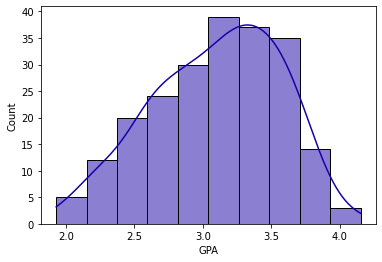

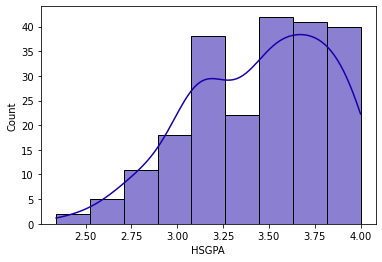

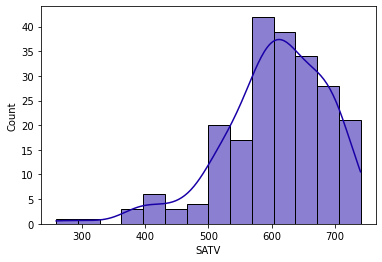

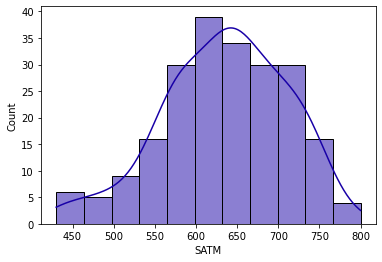

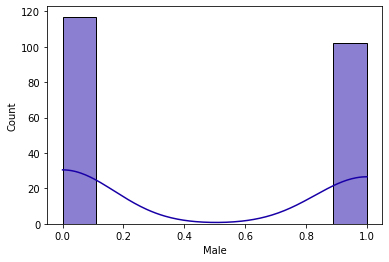

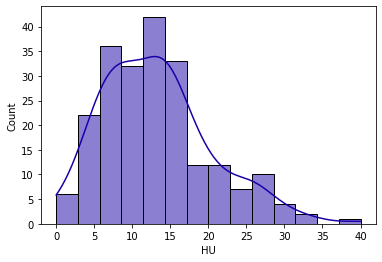

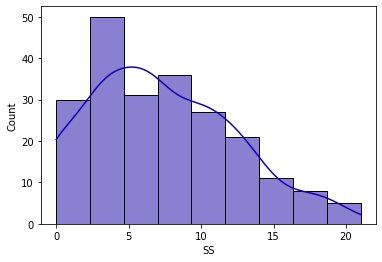

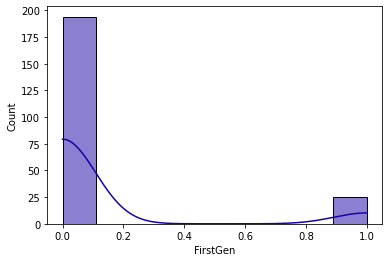

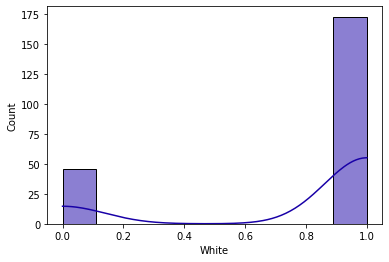

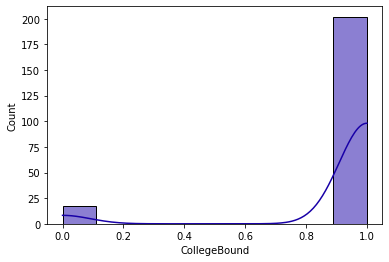

In [84]:
# univariate plotting to see distribution
#df.drop(columns=['Unnamed: 0']).columns
for col in list(df):
    sns.histplot(data = df, x = col, kde=True)
    plt.show()

### Takeaways
- Male, first gen, college bound are binomially distributed (1 or the other, categorical variables)
- Target (GPA) is normally distributed
- SATM is normally distributed
- SATV and HSGPA have a left tail
- SS and HU have a right tail 

## Split data and Explore (a bit)

In [26]:
# drop Unnamed column first
df.drop(columns='Unnamed: 0', inplace=True)

In [95]:
train, validate, test = w.banana_split(df)

train --> (122, 10)
validate --> (53, 10)
test --> (44, 10)


In [87]:
target = 'GPA'
cat_vars = ['Male', 'FirstGen', 'White', 'CollegeBound']
cont_vars = list(train.drop(columns=cat_vars).columns)

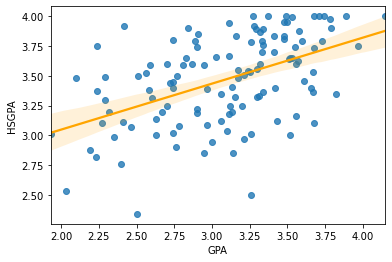

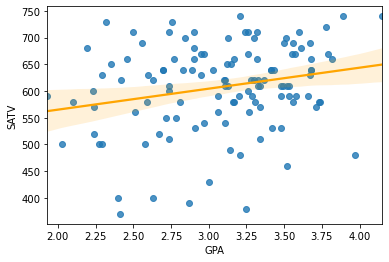

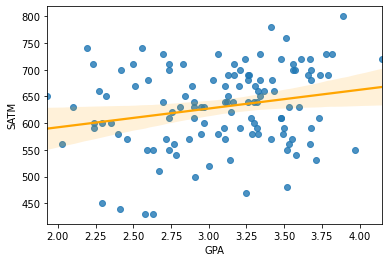

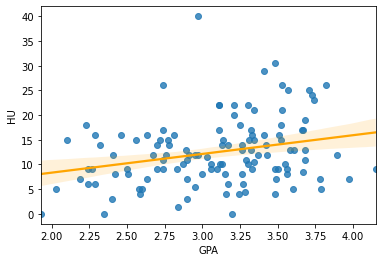

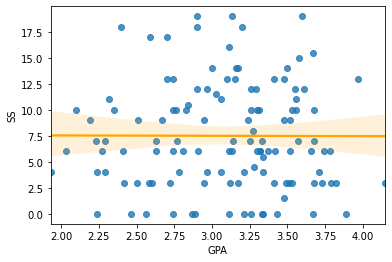

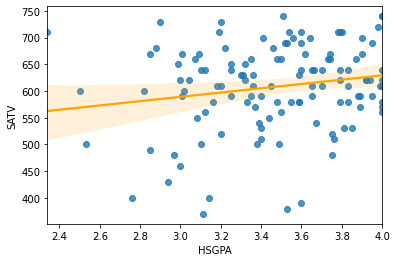

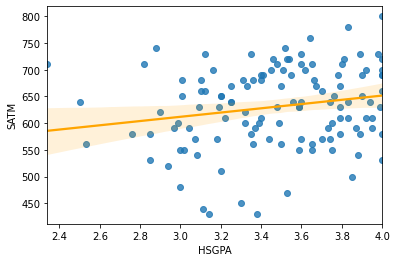

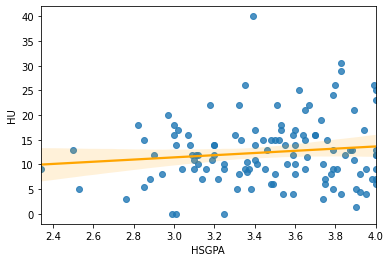

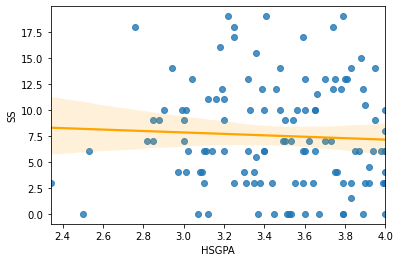

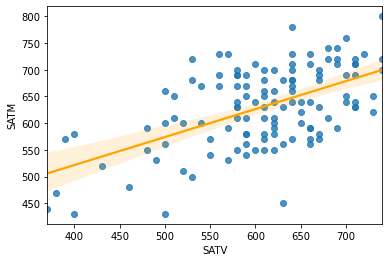

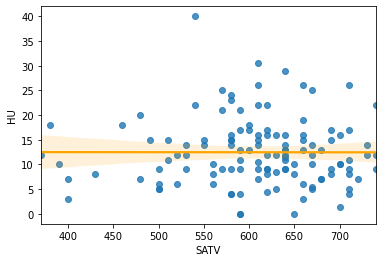

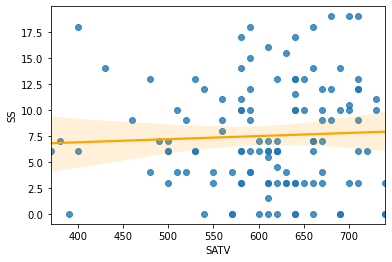

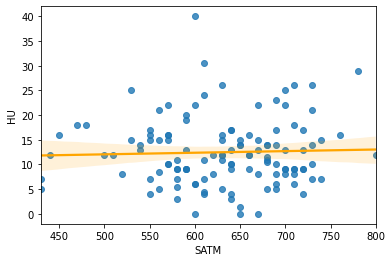

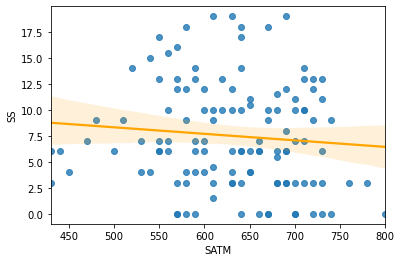

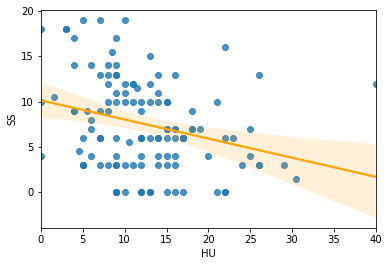

In [88]:
ex.plot_variable_pairs(train, cont_vars)

In [96]:
# scale data using my function
mm_scaler, scaled_cols = w.my_scaler(train, validate, test, list(train.columns), MinMaxScaler(), 'mm')

Your scaled columns have been added to your train validate and test dataframes.


In [98]:
# make a seperate dataframe for it
train_scaled = train[scaled_cols]

In [99]:
# look at scaled dataframe 
train_scaled.head()

GPA_mm  HSGPA_mm   SATV_mm   SATM_mm  Male_mm  HU_mm     SS_mm  \
199  0.373874  0.337349  0.972973  0.513514      1.0   0.30  0.526316   
28   0.572072  0.548193  0.594595  0.648649      0.0   0.00  0.947368   
112  0.333333  0.518072  0.405405  0.216216      0.0   0.30  0.473684   
188  0.216216  0.463855  0.000000  0.027027      0.0   0.30  0.315789   
87   0.603604  1.000000  0.513514  0.702703      0.0   0.15  0.421053   

     FirstGen_mm  White_mm  CollegeBound_mm  
199          0.0       1.0              1.0  
28           0.0       1.0              1.0  
112          0.0       0.0              1.0  
188          1.0       0.0              1.0  
87           1.0       1.0              1.0

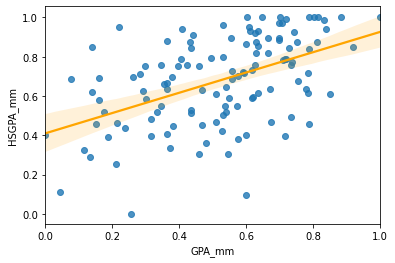

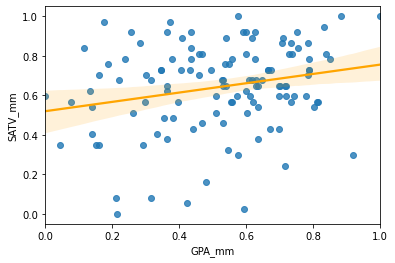

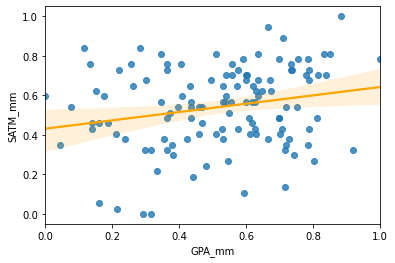

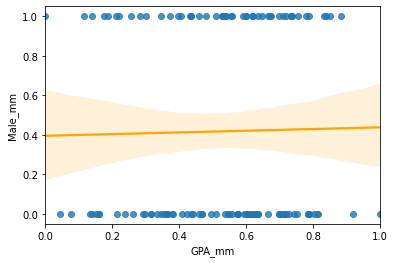

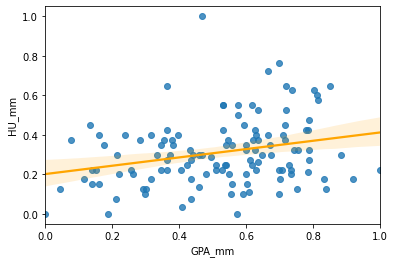

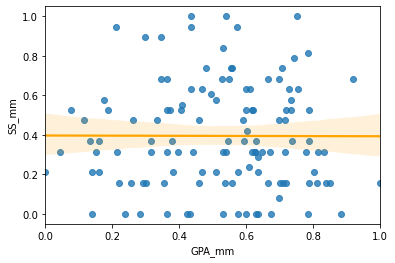

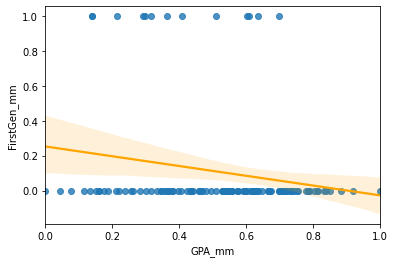

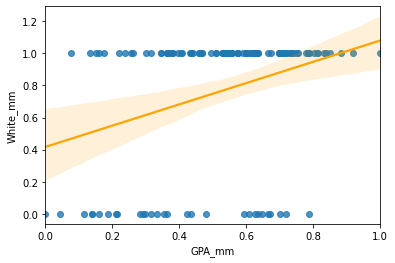

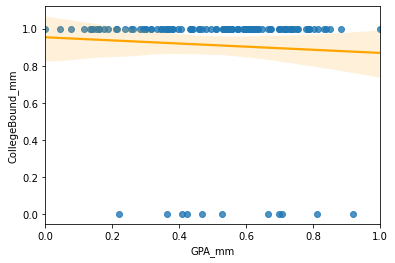

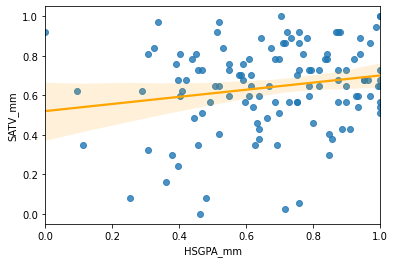

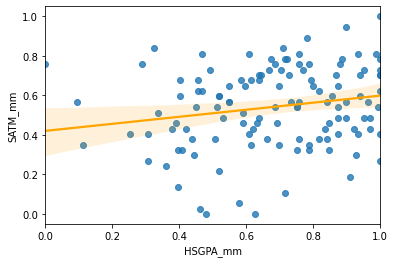

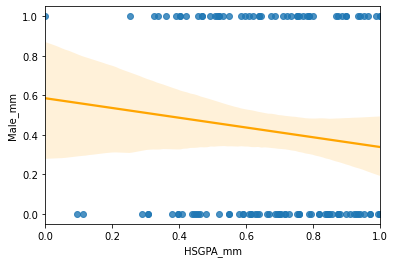

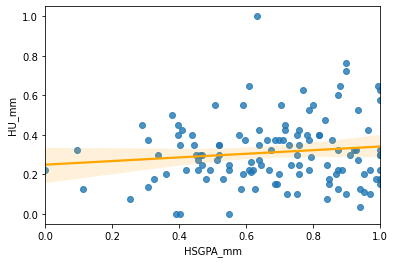

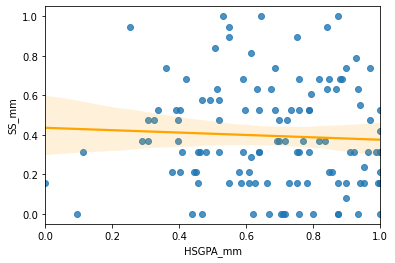

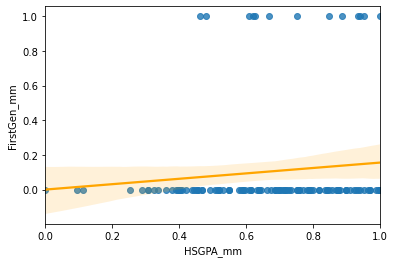

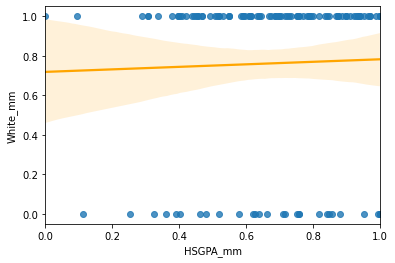

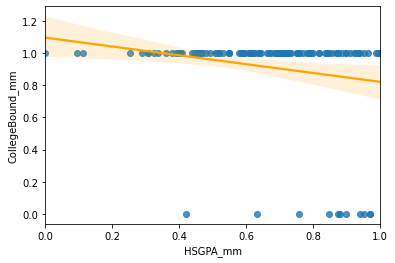

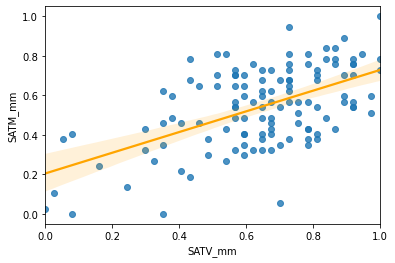

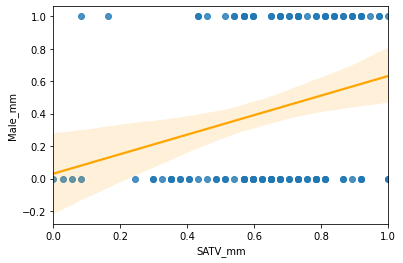

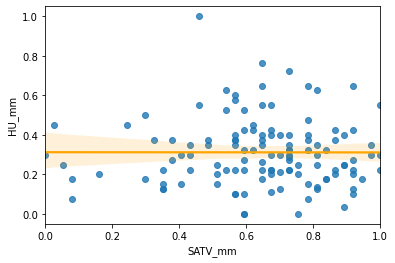

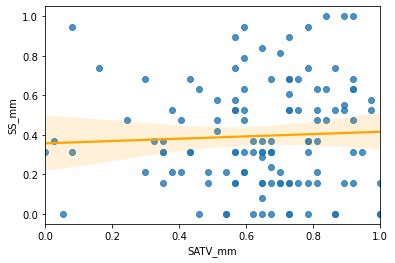

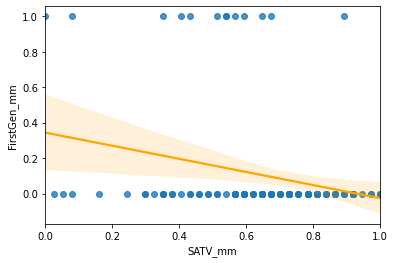

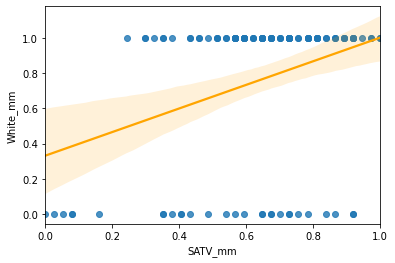

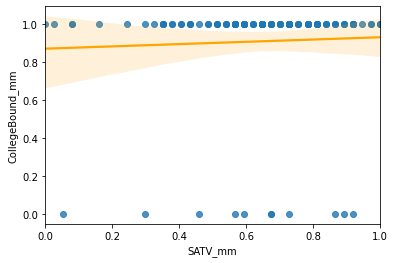

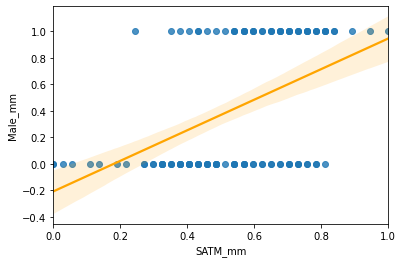

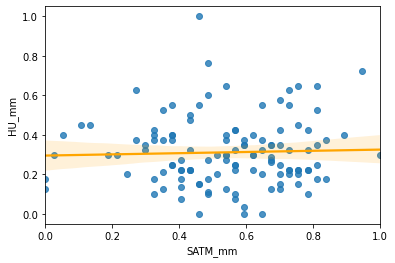

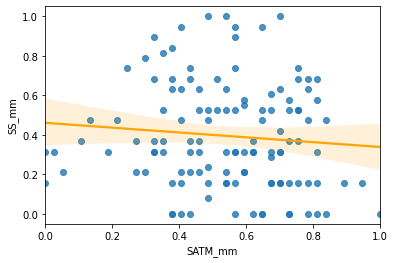

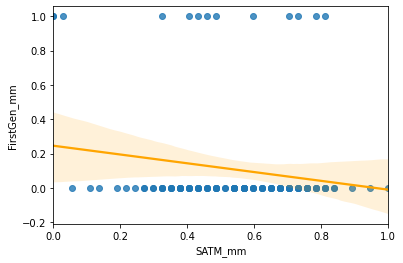

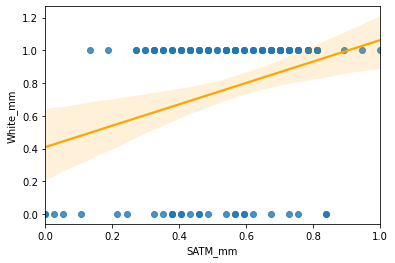

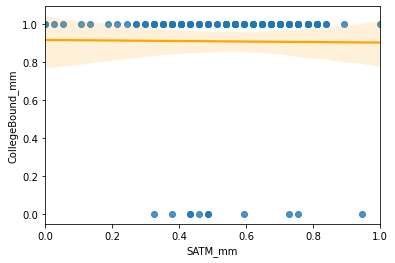

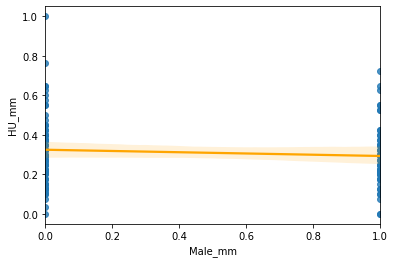

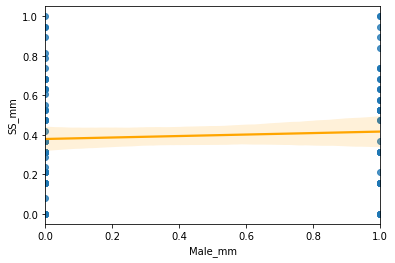

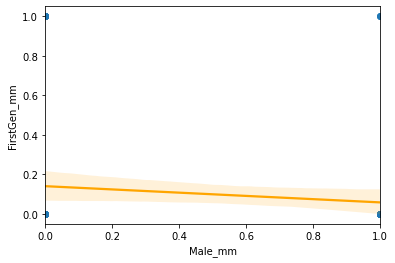

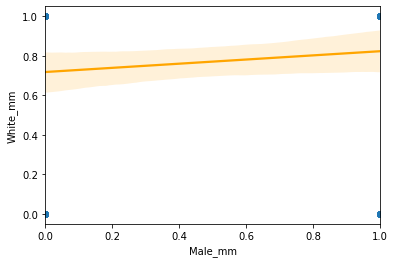

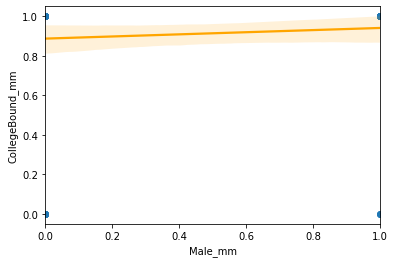

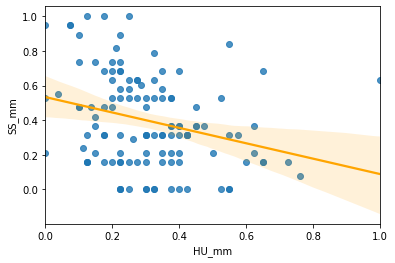

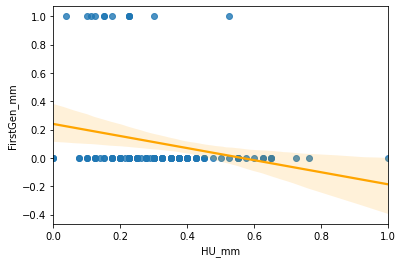

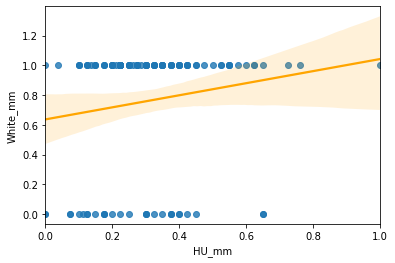

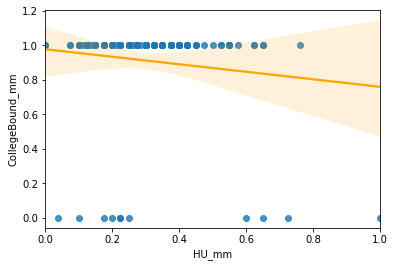

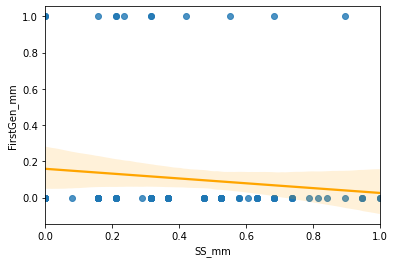

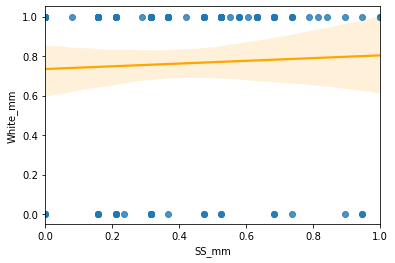

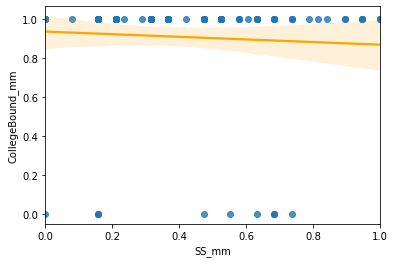

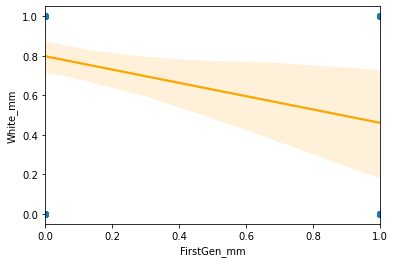

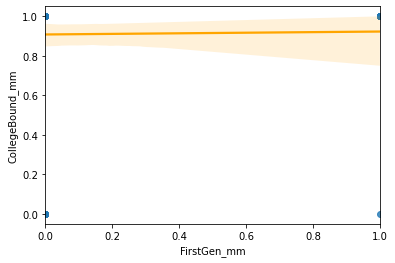

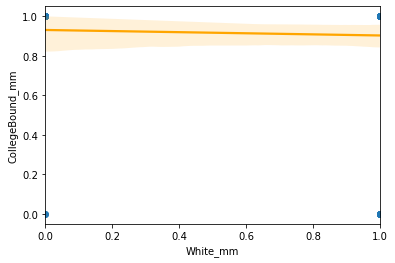

In [100]:
ex.plot_variable_pairs(train_scaled, scaled_cols)

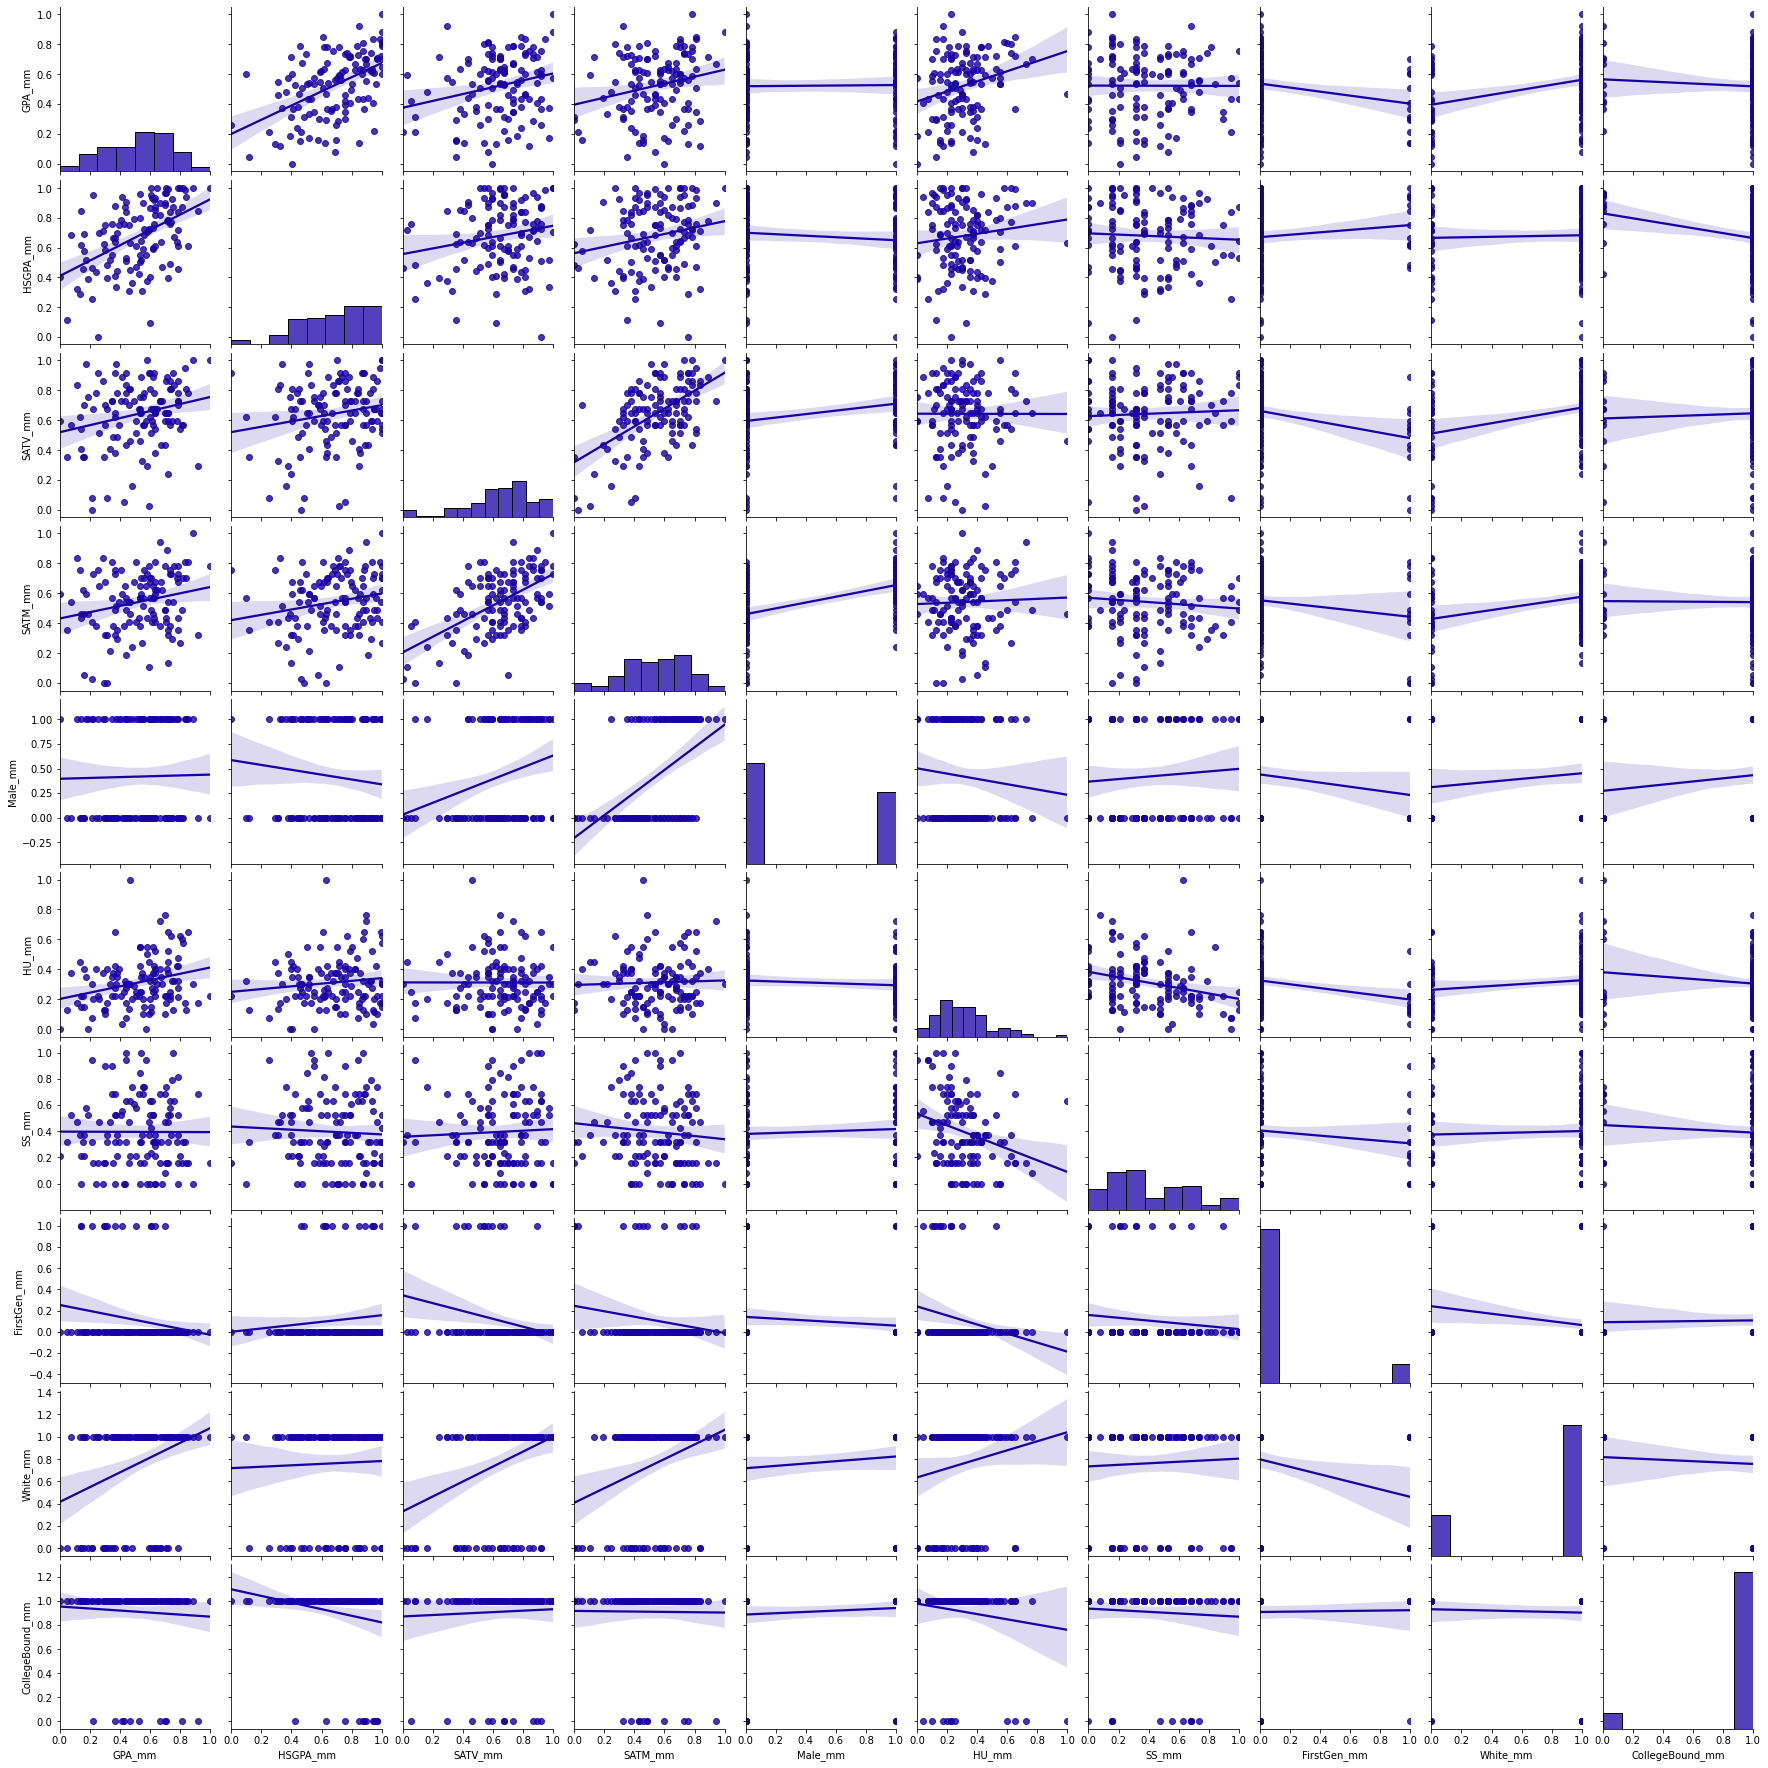

In [103]:
sns.pairplot(train_scaled, kind = 'reg')

### Takeaways
- biggest correlations seem to be High school gpa, SAT scores

<AxesSubplot:>

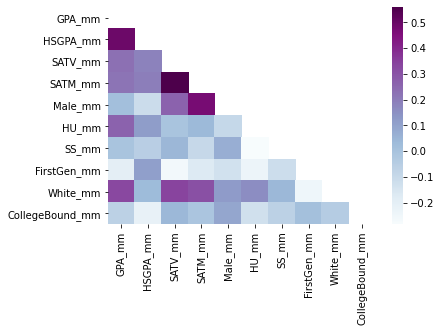

In [111]:
sns.heatmap(train_scaled.corr(), cmap='BuPu', mask = np.triu(train_scaled.corr()))

## Feature Selection

In [122]:
# Set X and y
y_train = train.GPA
X_train = train[scaled_cols].drop(columns= 'GPA_mm')

In [126]:
# Set X and y for validate
y_validate = validate.GPA
X_validate = validate[scaled_cols].drop(columns= 'GPA_mm')

# Set X and y for test
y_test = test.GPA
X_test = test[scaled_cols].drop(columns= 'GPA_mm')

In [120]:
ev.select_kbest(X_train, y_train, 4)

['HSGPA_mm', 'SATV_mm', 'HU_mm', 'White_mm']

In [130]:
ev.rfe(X_train, y_train, 3)

['HSGPA_mm', 'HU_mm', 'White_mm']

199    2.76
28     3.20
112    2.67
188    2.41
87     3.27
88     3.28
186    2.56
102    3.03
205    3.12
197    3.52
79     3.55
39     3.79
189    2.50
41     3.13
80     3.17
160    3.10
98     3.15
38     2.10
37     3.26
76     2.27
73     3.26
23     3.56
29     2.58
74     3.48
30     3.11
36     3.71
147    3.33
107    2.97
47     2.32
163    3.14
144    2.42
63     2.90
92     2.83
1      4.15
141    2.03
162    2.74
59     3.29
106    3.50
161    3.34
97     3.30
33     3.61
196    3.00
10     3.25
19     3.16
173    3.56
64     3.89
22     2.81
138    2.40
51     2.90
18     2.90
125    2.95
169    3.06
119    3.26
105    3.34
7      2.87
58     3.34
110    3.24
129    2.19
90     3.49
114    3.74
116    3.53
217    2.97
68     2.84
181    1.93
131    3.48
34     3.53
167    2.74
69     2.51
140    3.57
191    2.74
176    3.66
214    3.13
94     2.70
184    3.06
137    2.35
21     2.72
55     3.42
174    2.63
200    3.37
172    3.58
53     3.52
3      3.21
43     2.23
66  